Dataset already extracted.
Dataset folder structure verified.
Loading training data...




00%|██████████████████████████████████████████████████████████████████████████████| 9999/9999 [02:28<00:00, 67.36it/s]

Loaded 22564 images.
DataFrame created with 22564 rows and 2 columns.


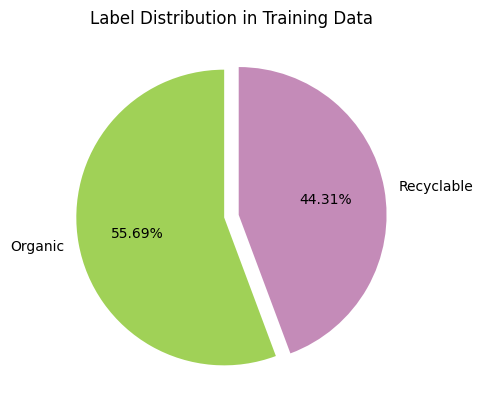

Visualization complete.


In [6]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# TensorFlow and Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import zipfile

# ----------------------------
# Step 1: Extract Dataset
# ----------------------------
zip_file = "dataset.zip"
dataset_path = "dataset"
if not os.path.exists(dataset_path):
    if os.path.exists(zip_file):
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(".")
        print("Dataset extracted successfully!")
    else:
        print(f"Error: '{zip_file}' not found!")
else:
    print("Dataset already extracted.")

# ----------------------------
# Step 2: Check Folder Structure
# ----------------------------
train_path = os.path.join(dataset_path, "TRAIN")
test_path = os.path.join(dataset_path, "TEST")

if not os.path.exists(train_path) or not os.path.exists(test_path):
    raise FileNotFoundError(f"Dataset folder structure is incorrect. Expected paths: {train_path}, {test_path}")
else:
    print("Dataset folder structure verified.")

# ----------------------------
# Step 3: Visualize Dataset
# ----------------------------
# Create empty lists for storing image data and labels
x_data = []
y_data = []

print("Loading training data...")
for category in glob(train_path + "/*"):  # Traverse TRAIN subfolders (O and R)
    for file in tqdm(glob(category + "/*")):  # Traverse each file in subfolders
        # Read and preprocess the image
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split(os.sep)[-1])  # Label is the folder name

print(f"Loaded {len(x_data)} images.")

# ----------------------------
# Step 4: Create DataFrame
# ----------------------------
# Create a DataFrame with the image data and labels
data = pd.DataFrame({'image': x_data, "label": y_data})

# Confirm DataFrame creation
print(f"DataFrame created with {data.shape[0]} rows and {data.shape[1]} columns.")

# ----------------------------
# Step 5: Visualize Label Distribution
# ----------------------------
# Label distribution pie chart
colors = ["#a0d157", "#c48bb8"]  # Custom colors
plt.pie(
    data.label.value_counts(),
    labels=["Organic", "Recyclable"],
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.05, 0.05]  # Explode effect
)
plt.title("Label Distribution in Training Data")
plt.show()

print("Visualization complete.")
